In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pyswarm import pso
from scipy.optimize import minimize, NonlinearConstraint


In [344]:
chips_data = pd.read_csv("chips.csv", header=None)[1:]
chips_X = chips_data.loc[:, 0:1]
chips_y = np.where(chips_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [345]:
geyser_data = pd.read_csv("geyser.csv", header=None)[1:]
geyser_X = geyser_data.loc[:, 0:1]
geyser_y = np.where(geyser_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [365]:
class SVM:
    X_train = None
    y_train = None
    X_test = None
    y_test = None


    def fit(self, X, y, kernel_name='linear', C=1, d=1, xi=1):
        self.X_train = np.array(X, dtype=np.float)
        self.y_train = np.array(y)
        self.N_train = self.X_train.shape[0]
        self.k_train = self.X_train.shape[1]
        self.C = C
        self.w0 = np.random.random()

        # def gaussian(a, b):
        #     res = np.empty((0, b.shape[0]))
        #     for row_a in a:
        #         res = np.append(res, np.array((row_a-b).sum(axis=1).reshape((1, -1))), axis=0)
        #     return res
        #
        def gaussian(a, b):
            res = np.empty((0, b.shape[0]))
            for row_a in a:
                row = np.array([])
                for row_b in b:
                    row = np.append(row, (row_a - row_b).sum())
                res = np.append(res, np.array([row]), axis=0)
            return res

        kernels = {
            'linear': lambda a, b: a @ b.T,
            'polynomial': lambda a, b: (a @ b.T + 1)**d,
            'gaussian': lambda a, b: np.exp(-xi * gaussian(a, b)**2),
        }
        self.kernel = kernels[kernel_name]
        self.__train__()


    def predict(self, X):
        return np.sign(self.K(X))

    def __possitive_cut__(self, x):
        return (x + np.abs(x))/2

    def K(self, X=None, w0=None):
        X = X if X is not None else self.X_train
        w0 = w0 if w0 is not None else self.w0
        return  (self.lamd * self.y_train * self.kernel(X, self.X_train)).sum(axis=1) - w0


    def __opt_func__(self, lamd):
        a = lamd.reshape((-1,1))
        b = self.y_train.reshape((-1,1))
        return .5 * (a*a.T * b*b.T * self.kernel(self.X_train, self.X_train)).sum() - a.sum()

    def __constraints__(self, lamd):
        return (lamd*self.y_train).sum()

    def __train__(self):
        # ub = np.full(self.N_train, self.C)
        # lb = np.full(self.N_train, 0)
        # self.lamd, fopt = pso(self.__opt_func__, lb=lb, ub=ub, f_ieqcons=self.__constraints__, swarmsize=100, maxiter=1000)
        # print((self.lamd*self.y_train).sum())
        # print(fopt)
        # self.w = np.array([(self.lamd * self.y_train * self.X_train[:, 0]).sum(axis=0), (self.lamd * self.y_train * self.X_train[:, 1]).sum(axis=0)])
        # print(self.K())
        # print(self.K(w0=1))
        # print(self.K(w0=0))
        # self.w0 = (self.w @ self.X_train.T - self.y_train)[np.where(self.lamd>0)[0][0]]
        # print(self.w0)
        bounds = np.full((self.N_train, 2), (0, self.C))
        constraints = NonlinearConstraint(self.__constraints__, 0, 0)
        res = minimize(self.__opt_func__, np.random.sample(self.N_train)*self.C, method='trust-constr', constraints=constraints, bounds=bounds)
        print(res)
        self.lamd = res.x
        print((self.lamd*self.y_train).sum())
        w = np.array([(self.lamd * self.y_train * self.X_train[:, 0]).sum(axis=0), (self.lamd * self.y_train * self.X_train[:, 1]).sum(axis=0)])

        print(np.where(self.y_train * self.K(w0 = 0) == 1))
        self.w0 = (w @ self.X_train.T - self.y_train)[0]
        print(self.w0)



    def visualize(self):
        X = self.X_train
        y = self.y_train
        xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 100), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 100))
        pred = self.predict(np.c_[xx.ravel(), yy.ravel()])
        pred = pred.reshape(xx.shape)

        plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))

        plt.scatter(X[:,0], X[:,1], c=y)
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.show()


In [366]:
svm = SVM()


 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
          cg_niter: 11599
      cg_stop_cond: 4
            constr: [array([-7.0219091e-13]), array([2.63996975e-05, 9.96329518e-03, 9.99664974e-03, 9.92996013e-03,
       9.98736923e-03, 9.41442145e-03, 9.98714914e-03, 1.30247918e-05,
       5.34526539e-03, 9.72711011e-06, 4.73339618e-03, 1.56542127e-05,
       9.98914857e-03, 4.40352456e-05, 3.02200884e-04, 9.96606589e-03,
       9.99611520e-03, 9.99442852e-03, 9.93896360e-03, 9.90651394e-03,
       9.70441968e-03, 9.90618755e-03, 9.99168553e-03, 9.95791191e-03,
       1.62122544e-05, 9.97279280e-03, 2.14907663e-05, 9.96824030e-03,
       4.88014652e-05, 9.98640435e-03, 9.97753504e-03, 9.95385994e-03,
       1.67832159e-05, 9.88223021e-03, 1.37872620e-05, 9.88384701e-03,
       1.68038747e-05, 9.95376427e-03, 9.98800920e-03, 9.95174961e-03,
       9.98322399e-03, 9.99604903e-03, 9.99697865e-03, 9.98621763e-03,
       9.97855918e-03, 9.97856264e-03, 9.

<ipython-input-346-95f4ea44c6ff>:87: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))


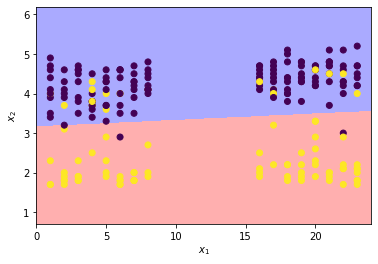

In [352]:
# for C in [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]:
svm.fit(geyser_X, geyser_y, C=.01)
svm.visualize()

 barrier_parameter: 5.120000000000003e-08
 barrier_tolerance: 5.120000000000003e-08
          cg_niter: 1178
      cg_stop_cond: 4
            constr: [array([-6.10622664e-16]), array([4.99999861e-01, 4.99999838e-01, 4.99999881e-01, 4.99999833e-01,
       4.99999921e-01, 4.99999909e-01, 4.99999797e-01, 4.99999857e-01,
       4.99999852e-01, 4.99999920e-01, 4.99999946e-01, 4.99999952e-01,
       4.99999929e-01, 4.99999949e-01, 4.99999932e-01, 4.99999867e-01,
       4.99998119e-01, 4.99999930e-01, 4.99999875e-01, 4.99999938e-01,
       4.99999956e-01, 4.99999947e-01, 4.99999949e-01, 4.99999944e-01,
       4.99999896e-01, 4.99999947e-01, 4.99999948e-01, 4.99999966e-01,
       4.99991504e-01, 4.99999936e-01, 4.99999964e-01, 4.99999929e-01,
       4.99999812e-01, 4.99999272e-01, 4.99999381e-01, 4.62857701e-01,
       4.99999785e-01, 4.59631457e-07, 2.12417921e-07, 4.99999844e-01,
       1.29252846e-06, 4.99999758e-01, 4.99999917e-01, 3.89139184e-01,
       4.99999903e-01, 4.99999887e-01, 4.

<ipython-input-346-95f4ea44c6ff>:87: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))


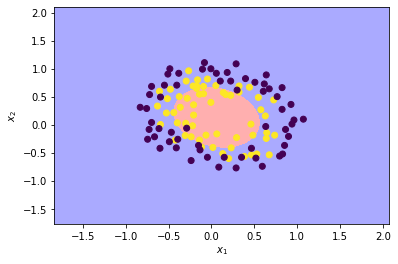

In [349]:
# for C in [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]:
# for i in range(2, 6):
svm.fit(chips_X, chips_y, kernel_name='polynomial', d=2, C=.5)
svm.visualize()

In [ ]:
# for i in range(1, 6):
svm.fit(chips_X, chips_y, kernel_name='gaussian', xi=1, C=1)
svm.visualize()
# print(svm.predict(np.array(geyser_X, dtype=np.float)))
# print(geyser_y)

/home/neutralmike/Projects/ml_labs/venv/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
